# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [32]:
data = pd.read_csv("singapore_tourist_new.csv", index_col="Month", parse_dates=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2012-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   values  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [36]:
data.head()

,values
Month,
2012-01-01,22
2012-02-01,35
2012-03-01,34
2012-04-01,35
2012-05-01,51


In [38]:
data.shape

(96, 1)

In [42]:
#Kiểm tra dữ liệu bị miss
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


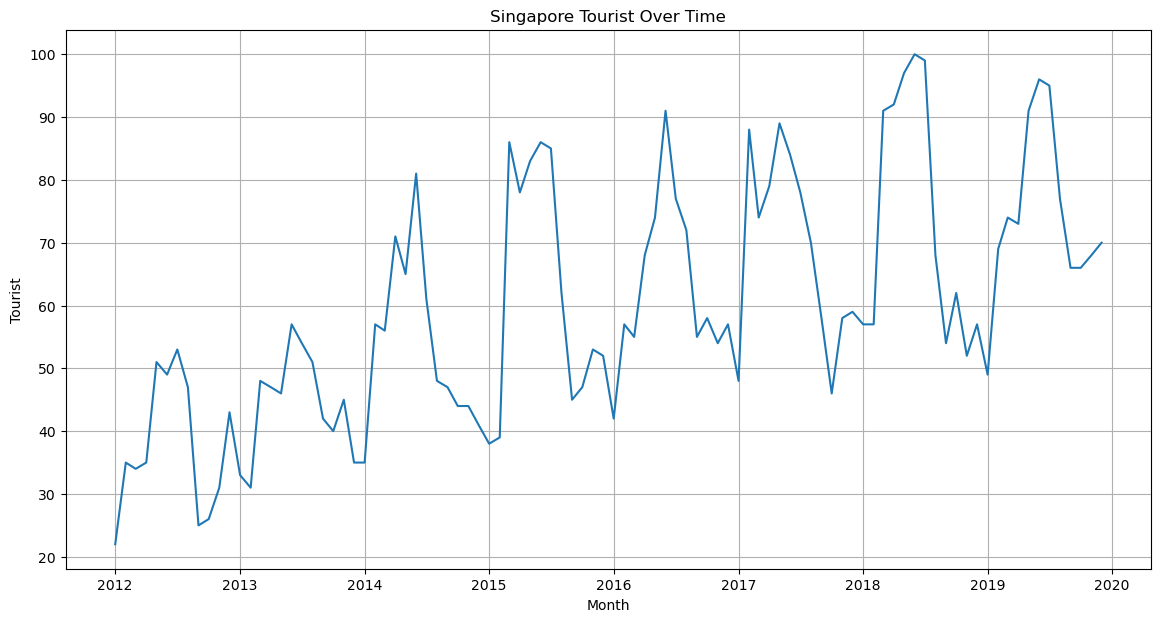

In [44]:
# Trực quan hóa dữ liệu bằng line plt
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='Month',
    y='values',
    data=data
)
plt.title('Singapore Tourist Over Time')
plt.xlabel('Month')
plt.ylabel('Tourist')
plt.grid(True)
plt.show()

In [46]:
#KIỂM TRA OUTLIERS BẰNG CÁCH DÙNG Z_SCORES
# Tính trung bình và độ lệch chuẩn cuộn (rolling mean và rolling std)
rolling_mean = data.rolling(window=12).mean()
rolling_std = data.rolling(window=12).std()

# Tính z-score cho giá trị cuộn
rolling_z_scores = (data - rolling_mean) / rolling_std

# Xác định các giá trị bất thường (anomalies)
anomalies = data[(rolling_z_scores > 3) | (rolling_z_scores < -3)]

# Hiển thị dữ liệu bất thường
print(anomalies)

            values
Month             
2012-01-01     NaN
2012-02-01     NaN
2012-03-01     NaN
2012-04-01     NaN
2012-05-01     NaN
...            ...
2019-08-01     NaN
2019-09-01     NaN
2019-10-01     NaN
2019-11-01     NaN
2019-12-01     NaN

[96 rows x 1 columns]


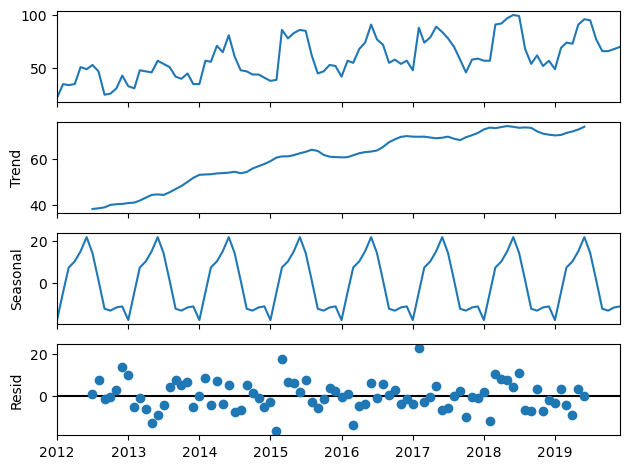

In [48]:
# XEM 3 TÍNH NĂNG CHÍNH CỦA TIME SERIES ANALYSIS -> trend, seasonal, noise
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=data, model='additive')
result.plot()
plt.show()

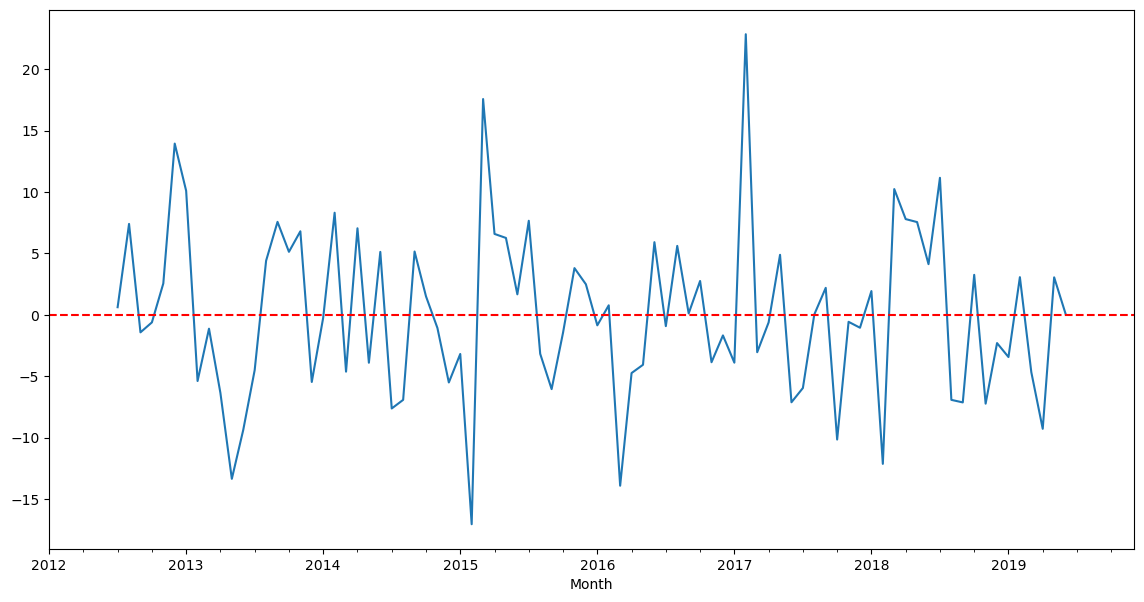

In [51]:
#xem sai số (nhiễu)
plt.figure(figsize=(14, 7))
result.resid.plot()
plt.axhline(y=0, color='r', linestyle='--')

# Kết luận

Dữ liệu không có bị trùng, thiếu và không có outliers. Qua lineplot có thể thấy biểu đồ lượng hành khách có các đỉnh và đáy cách đều nhau, vì vậy có thể lượng hành khách này có hành vi theo mùa. Cụ thể tính năng của dữ liệu:
- Trend (xu hướng): tăng dần
- Seasonal (mùa vụ): các đỉnh và đáy đều nhau -> có yếu tố mùa vụ
- Resid (resid): có nhiễu nhưng không nhiều